<a href="https://colab.research.google.com/github/Anderson1292/data_science/blob/main/notebooks/Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sbn
import statistics as stc

In [2]:
dataset = pd.read_csv('Churn.csv',sep=';')
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [3]:
dataset.shape

(999, 12)

In [4]:
#Atribuindo nome as colunas
dataset.columns = ['Id','Score','Estado','Genero','Idade','Patrimonio','Saldo','Produtos','TemCartCredito','Ativo','Salario','Saiu']
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [5]:
#exploração de dados categóricos
dados = dataset.groupby(['Estado']).size()
dados

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<Axes: xlabel='Estado'>

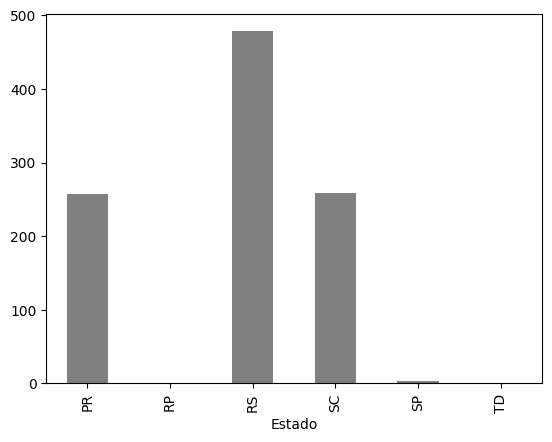

In [6]:
dados.plot.bar(color='gray')

In [7]:
#exploração de dados categóricos
dados = dataset.groupby(['Genero']).size()
dados

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<Axes: xlabel='Genero'>

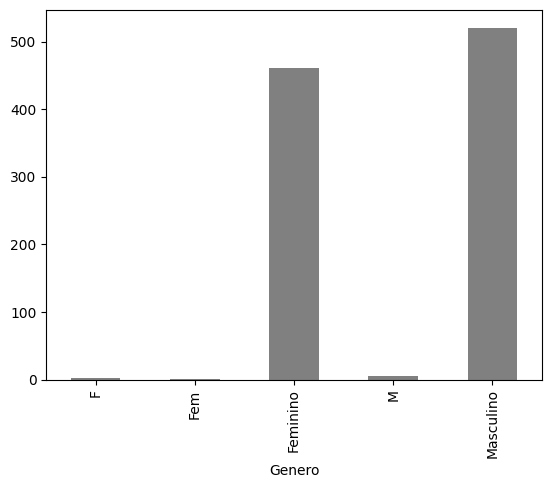

In [8]:
dados.plot.bar(color='gray')

In [9]:
#exploração de dados numéricos
#Score
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

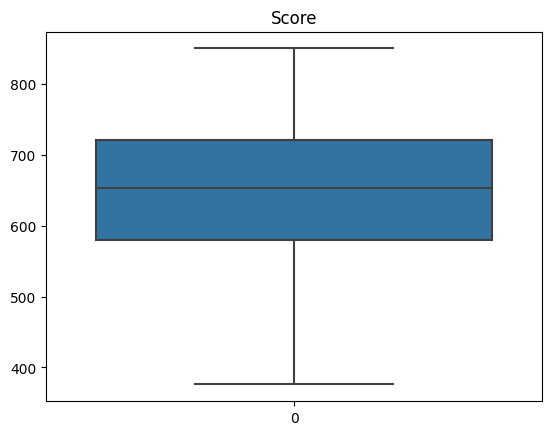

In [10]:
sbn.boxplot(dataset['Score']).set_title('Score')

Text(0.5, 1.0, 'Score')

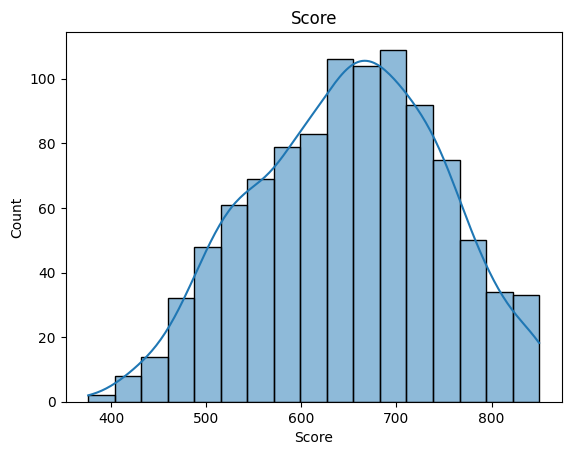

In [11]:
sbn.histplot(dataset['Score'],kde=True).set_title('Score')

In [15]:
#idade
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

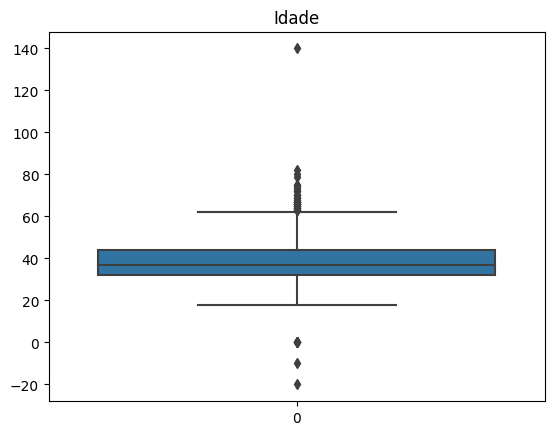

In [ ]:
sbn.boxplot(dataset['Idade']).set_title('Idade')

Text(0.5, 1.0, 'Idade')

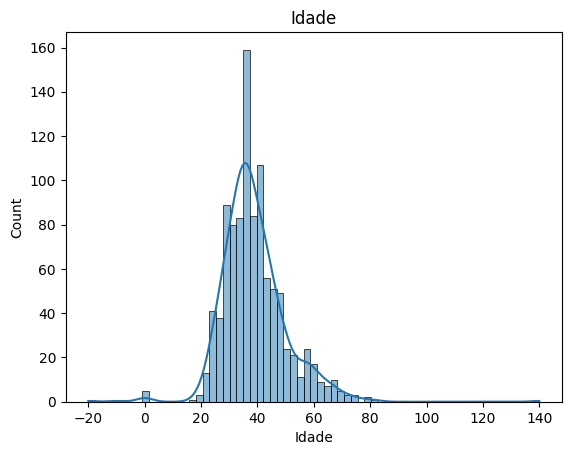

In [ ]:
sbn.histplot(dataset['Idade'],kde=True).set_title('Idade')

In [16]:
#saldo
dataset['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

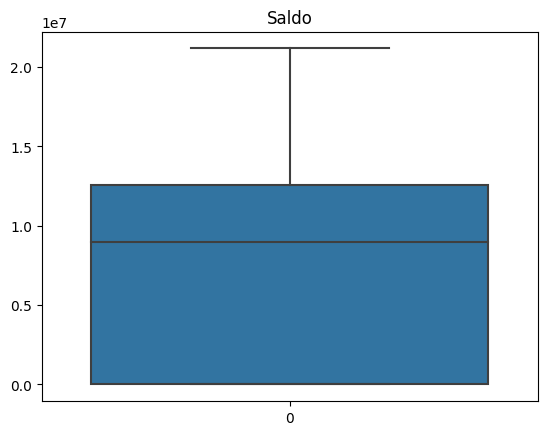

In [ ]:
sbn.boxplot(dataset['Saldo']).set_title('Saldo')

Text(0.5, 1.0, 'Saldo')

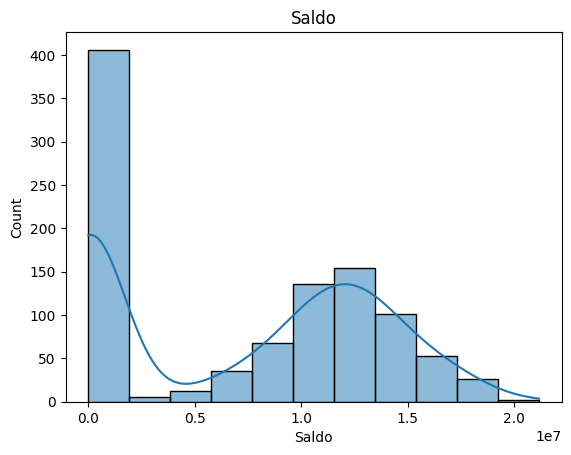

In [ ]:
sbn.histplot(dataset['Saldo'],kde=True).set_title('Saldo')

Text(0.5, 1.0, 'Salario')

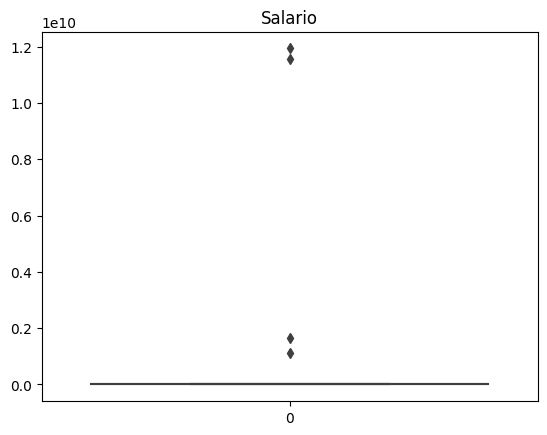

In [12]:
sbn.boxplot(dataset['Salario']).set_title('Salario')

Text(0.5, 1.0, 'Salario')

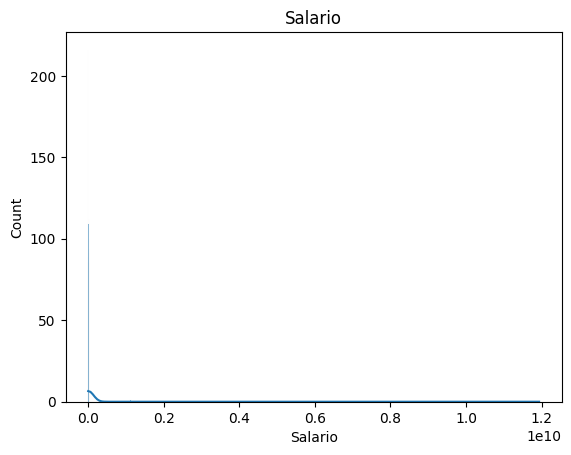

In [13]:
sbn.histplot(dataset['Salario'],kde=True).set_title('Salario')

In [14]:
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [17]:
#encontrando valores NAN
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

In [18]:
#salario
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [19]:
#substituindo NaN pelo valor da mediana
mediana = stc.median(dataset['Salario'])
dataset['Salario'].fillna(mediana,inplace=True)

In [20]:
dataset['Salario'].isnull().sum()

0

In [21]:
dados = dataset.groupby(['Genero']).size()
dados

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [22]:
dataset['Genero'].isnull().sum()

8

In [23]:
dataset['Genero'].fillna('Masculino',inplace=True)

In [24]:
dataset['Genero'].isnull().sum()

0

In [26]:
dataset.loc[dataset['Genero']=='M','Genero'] = 'Masculino'
dataset.loc[dataset['Genero'].isin(['Fem','F']),'Genero'] = 'Feminino'
#Visualizaçao dos resultados
data = dataset.groupby(['Genero']).size()
data

Genero
Feminino     464
Masculino    535
dtype: int64

In [28]:
#idades fora do padrão
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [29]:
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [30]:
mediana = stc.median(dataset['Idade'])
mediana

37

In [31]:
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)] = mediana

In [33]:
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] < 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,SC,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,SC,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,SC,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,SC,Masculino,62,7,12128627,1,0,1,677692.0,0


In [34]:
#dados duplicados
dataset[dataset.duplicated(['Id'],keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
36,37,490,SC,Masculino,31,3,14526023,1,0,1,11406677.0,0
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
867,37,37,37,37,37,37,37,37,37,37,37.0,37
984,37,37,37,37,37,37,37,37,37,37,37.0,37
990,37,37,37,37,37,37,37,37,37,37,37.0,37


In [35]:
dataset.drop_duplicates(subset='Id',keep='first',inplace=True)
dataset[dataset.duplicated(['Id'],keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [37]:
data = dataset.groupby(['Estado']).size()
data

Estado
PR    257
RP      1
RS    474
SC    258
SP      4
TD      1
dtype: int64

In [38]:
dataset.loc[dataset['Estado'].isin(['RP','SP','TD']),'Estado'] = 'RS'
data = dataset.groupby(['Estado']).size()
data

Estado
PR    257
RS    480
SC    258
dtype: int64

In [39]:
#Outliers em salários
desv = stc.stdev(dataset['Salario'])
desv

529784177.60963464

In [40]:
dataset.loc[dataset['Salario'] >= 2*desv]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [41]:
mediana = stc.median(dataset['Salario'])
mediana

8641028.0

In [42]:
dataset.loc[dataset['Salario'] >= 2*desv, 'Salario'] = mediana
dataset.loc[dataset['Salario'] >= 2*desv]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [44]:
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [47]:
dataset.shape

(995, 12)